In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
        115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
        150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
        218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
        556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
        850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
        1000.0])

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)


(42, 1)
(14, 1)
(42,)
(14,)


In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [5]:

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.974645996398761


In [6]:
print(knr.predict([[50]]))

[1033.33333333]


[1033.33333333]
[[[44.]
  [43.]
  [43.]]]


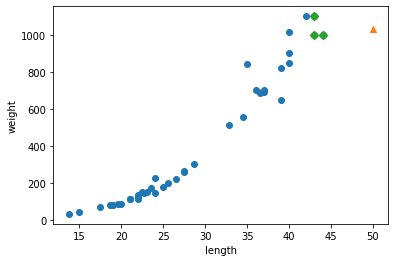

In [7]:
import matplotlib.pyplot as plt

length =50
print(knr.predict([[length]]))
_, indices = knr.kneighbors([[length]])

plt.scatter(train_input, train_target)
plt.scatter(length,knr.predict([[length]]), marker = '^')
plt.scatter(train_input[indices], train_target[indices], marker='D')

print(train_input[indices])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

print(50, lr.predict([[50]]))
print(80, lr.predict([[80]]))

50 [1241.83860323]
80 [2412.35295214]


In [9]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


[1033.33333333]
[[[44.]
  [43.]
  [43.]]]


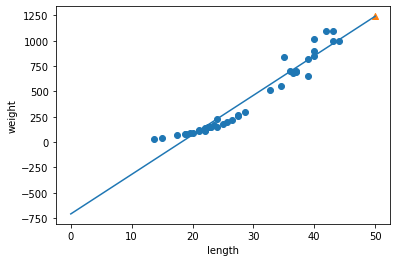

In [12]:
test_length = 50
print(knr.predict([[test_length]]))
_, indices = knr.kneighbors([[test_length]])

plt.scatter(train_input, train_target)
#plt.scatter(length,knr.predict([[length]]), marker = '^')
plt.plot([0,50], [lr.coef_*0 + lr.intercept_, lr.coef_*50 + lr.intercept_ ])
plt.scatter(test_length, lr.predict([[test_length]]), marker= '^')

print(train_input[indices])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


In [13]:
train_poly = np.column_stack((train_input ** 2 , train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape)
print(test_poly.shape)

train_poly[:3]

(42, 2)
(14, 2)


array([[384.16,  19.6 ],
       [484.  ,  22.  ],
       [349.69,  18.7 ]])

In [16]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression()

lr2.fit(train_poly, train_target)

print(50, lr2.predict([[50**2, 50]]))
print(80, lr2.predict([[80**2, 50]]))

print(lr2.score(train_poly, train_target))
print(lr2.score(test_poly, test_target))

50 [1573.98423528]
80 [5529.87946185]
0.9706807451768623
0.9775935108325122


In [17]:
print(lr2.coef_, lr2.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


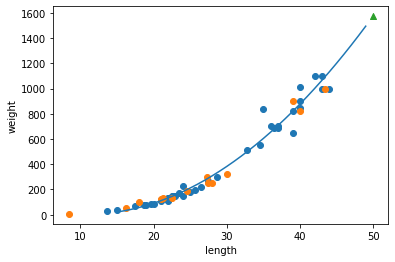

In [22]:
x = np.arange(15, 50)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

plt.plot(x, lr2.coef_[0] * x ** 2 + lr2.coef_[1] * x + lr2.intercept_)
plt.scatter(50, lr2.predict([[50**2, 50]]), marker= '^')


plt.xlabel('length')
plt.ylabel('weight')
plt.show()